# Logistic Regression and Natural Language Processing (Spam/Ham Prediction)

## Penjelasan Kolom:

- Category = Kategori pesan spam/ham
- Message = Isi dari pesan email

## A. Data Preparation

### A.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

list_stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

kamus_singkatan = {
    "u": "you", "ur": "your", "r": "are", "n": "and", "d": "the",
    "b4": "before", "c": "see", "lol": "laughing out loud",
    "txt": "text", "2": "to", "4": "for", "wif": "with", "oni": "only",
    "dun": "done", "thk": "think"
}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### A.2 Load Data

In [3]:
try:
    df = pd.read_csv('email.csv')
    print("Berhasil membaca csv")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca csv


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


### A.4 Melihat Informasi Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### A.5 Melihat Dimensi Data

In [7]:
df.shape

(5573, 2)

### A.6 Cek Data Duplikat

In [8]:
df.duplicated().sum()

np.int64(415)

In [9]:
df.drop_duplicates(inplace=True)

### A.7 Cek Data Hilang

In [10]:
df.isna().sum()

Category    0
Message     0
dtype: int64

## B. Data Preprocessing

### B.1 Cek Label

In [11]:
df['Category'].value_counts()

Category
ham               4516
spam               641
{"mode":"full"       1
Name: count, dtype: int64

In [12]:
valid_categories = ['ham', 'spam']
df = df[df['Category'].isin(valid_categories)].copy()

In [13]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

### B.2 Text Preprocessing

#### Linguistic Processing (Bahasa Inggris)

In [14]:
def linguistic_processing_english(list_of_words):
    clean_words = []
    for word in list_of_words:
        
        # 1. Normalisasi Singkatan
        word = kamus_singkatan.get(word, word)
        
        # 2. Stopword Removal
        if word not in list_stopwords:
            
            # 3. Lemmatization
            lemma_word = lemmatizer.lemmatize(word)
            clean_words.append(lemma_word)
            
    return " ".join(clean_words)

#### Preprocess Text

In [15]:

def preprocess_text(text_series):
    # 1. Case Folding/Normalization (Jadikan huruf kecil)
    # 2. Text Cleaning (Hapus angka/simbol aneh)
    # 3. Remove Punctuation (Hapus tanda baca)
    # 4. Tokenization (Split jadi list kata)
    temp_tokens = text_series.str.lower().str.replace(r'[^a-z\s]', ' ', regex=True).str.split()
    
    # Linguistic Processing Bahasa Inggris (NLTK)
    return temp_tokens.apply(linguistic_processing_english)

df['clean_message'] = preprocess_text(df['Message'])

In [16]:
df['clean_message'].head()

0    go jurong point crazy available bugis great wo...
1                                        ok lar joking
2    free entry wkly comp win fa cup final tkts st ...
3                   done say early hor see already say
4                  nah think go usf life around though
Name: clean_message, dtype: object

## C. Exploratory Data Analysis (EDA)

### C.1 Visualisasi Label

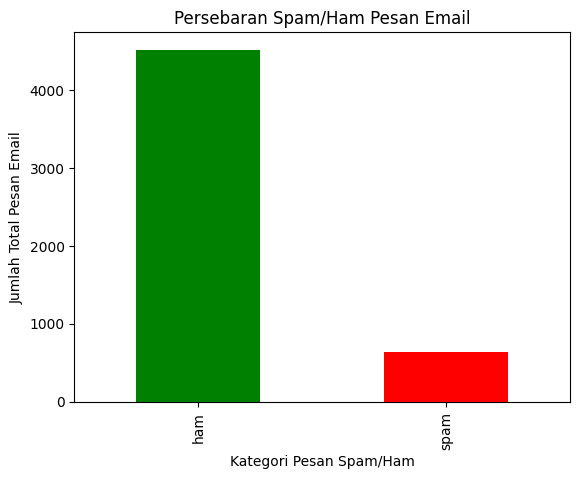

In [17]:
df['Category'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Persebaran Spam/Ham Pesan Email")
plt.xlabel("Kategori Pesan Spam/Ham")
plt.ylabel("Jumlah Total Pesan Email")
plt.show()

In [18]:
df['Category'].value_counts(normalize=True * 100)

Category
ham     0.875703
spam    0.124297
Name: proportion, dtype: float64

In [19]:
def top_words(text_series, n=10):
    all_text = " ".join(text_series)
    word_list = all_text.split()
    top_words = pd.Series(word_list).value_counts().head(n)
    return top_words

Text(0.5, 1.0, 'Top 10 Kata SPAM')

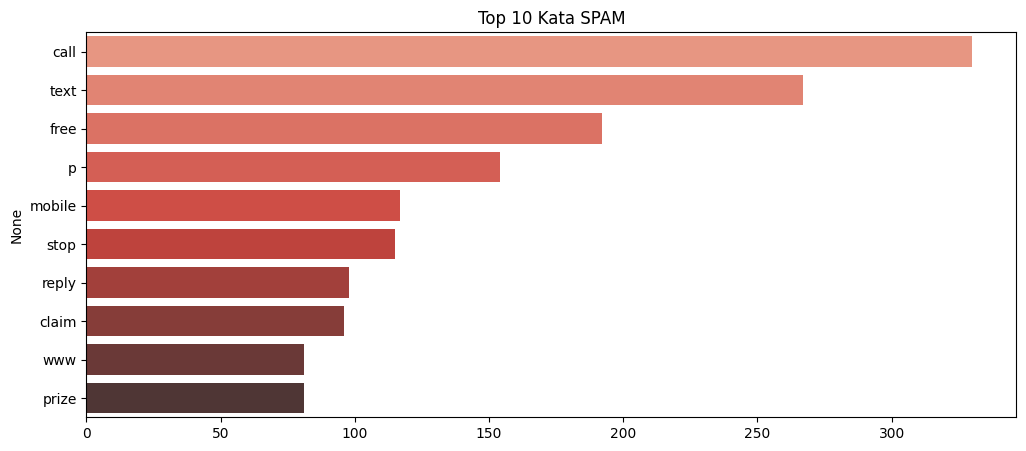

In [20]:
plt.figure(figsize=(12, 5))
spam_data = top_words(df[df['Category'] == 'spam']['clean_message'], 10)
sns.barplot(x=spam_data.values, y=spam_data.index, hue=spam_data.index, palette='Reds_d', legend=False)
plt.title('Top 10 Kata SPAM')

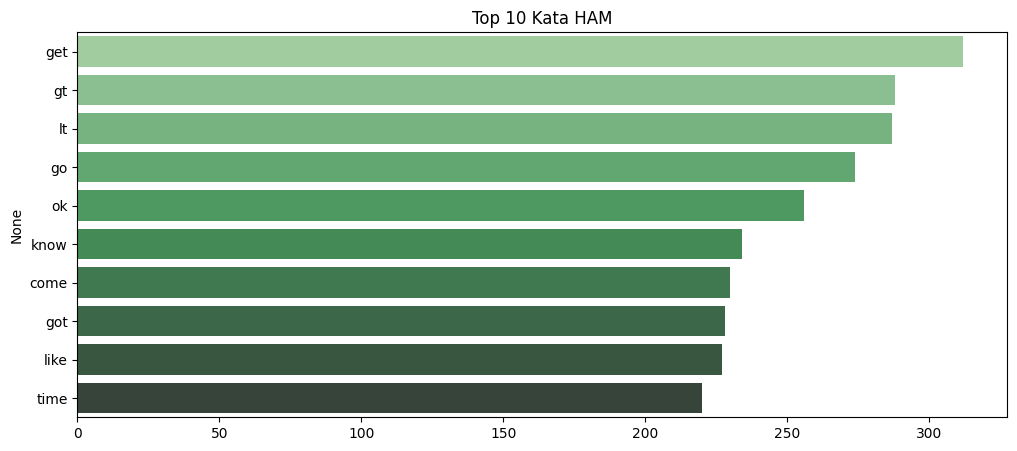

In [21]:
plt.figure(figsize=(12, 5))
ham_data = top_words(df[df['Category'] == 'ham']['clean_message'], 10)
sns.barplot(x=ham_data.values, y=ham_data.index, hue=spam_data.index, palette='Greens_d', legend=False)
plt.title('Top 10 Kata HAM')
plt.show()

## D. Feature Engineering

### D.1 Encoding/Mapping

In [22]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [23]:
category_mapping = {'ham' : 0, 'spam' : 1}
df['Category'] = df['Category'].map(category_mapping)

In [24]:
df['Category'].unique()

array([0, 1])

In [25]:
df.head()

,Category,Message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,0,Ok lar... Joking wif u oni...,ok lar joking
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,done say early hor see already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


## E. Modelling

### E.1 Defining X (Feature) and y (Target) Variables

In [26]:
X_data = df['clean_message']
y_data = df['Category']

### E.2 Splitting Data Training and Data Testing (80:20)

In [27]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42, frac=None):
    np.random.seed(random_state)
    
    if frac:
        X_data = X_data.sample(frac=frac, random_state=random_state)
        y_data = y_data.loc[X_data.index]
        
    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### E.3 Resampling Train Data

In [28]:
train_data = pd.DataFrame({'Message': X_train, 'Category': y_train})

major_label = train_data[train_data['Category'] == 0]
minor_label = train_data[train_data['Category'] == 1]

target_label = len(major_label)

minor_label_oversampled = minor_label.sample(n=target_label, replace=True, random_state=42)

train_balanced = pd.concat([major_label, minor_label_oversampled])
train_balanced.shape

(7224, 2)

### E.4 Defining Balanced X (Feature) and y (Target) Variables

In [29]:
X_train_clean = preprocess_text(train_balanced['Message'])
X_test_clean = preprocess_text(X_test)

y_train = train_balanced['Category'].values
y_test = y_test.values

### E.5 TF - IDF Formulas

#### Membangun Kamus/Vocabulary

In [30]:
def build_vocabulary(text_series):
    # Gabung semua teks & ambil kata unik
    all_text = " ".join(text_series)
    unique_words = set(all_text.split())
    
    # Urutkan & beri nomor index
    vocab_index = {word: i for i, word in enumerate(sorted(list(unique_words)))}
    return vocab_index

#### Menghitung TF (Term Frequency)

In [31]:
def calculate_tf(text_series, vocab_index):
    n_docs = len(text_series)
    n_vocab = len(vocab_index)
    
    # Matriks Kosong untuk TF
    tf_matrix = np.zeros((n_docs, n_vocab))
    
    for row, text in enumerate(text_series):
        words = text.split()
        for w in words:
            # Jika kata ada di kamus, tambahkan hitungannya (+1)
            if w in vocab_index:
                col_idx = vocab_index[w]
                tf_matrix[row, col_idx] += 1
                
    return tf_matrix

#### Menghitung IDF (Inverse Document Frequency)

In [32]:
def calculate_idf(text_series, vocab_index):
    n_docs = len(text_series)
    vocab_list = list(vocab_index.keys())
    
    # Hitung DF (Document Frequency)
    df_counts = dict.fromkeys(vocab_list, 0)
    for text in text_series:
        unique_words_in_sms = set(text.split()) # Kata unik per SMS
        for word in unique_words_in_sms:
            if word in df_counts:
                df_counts[word] += 1
    
    # Hitung Rumus IDF
    idf_values = {}
    for word, count in df_counts.items():
        # Rumus: log(Total Dokumen / (Jumlah Dokumen yg punya kata itu + 1))
        idf_values[word] = np.log(n_docs / (count + 1))
        
    return idf_values

#### Menghitung TF-IDF

In [33]:
def multiply_tf_idf(tf_matrix, vocab_index, idf_values):
    # Kita copy dulu matriks TF biar aslinya gak berubah
    tfidf_matrix = tf_matrix.copy()
    
    # Ambil jumlah baris dan kolom
    n_docs, n_vocab = tfidf_matrix.shape
    
    # Lakukan Perkalian: TF * IDF
    # Kita loop per kolom (per kata)
    for word, col_idx in vocab_index.items():
        idf_score = idf_values[word]
        
        # Kalikan seluruh kolom tersebut dengan nilai IDF-nya
        # (Kolom 'aku' dikali skor IDF 'aku', dst)
        tfidf_matrix[:, col_idx] = tfidf_matrix[:, col_idx] * idf_score
        
    return tfidf_matrix

#### Menjalankan Semua Methods TF-IDF + Normalisasi

In [34]:
def normalize_l2(matrix):
    norms = np.sqrt(np.sum(matrix**2, axis=1, keepdims=True))
    norms[norms == 0] = 1
    return matrix / norms

In [35]:
# 1. Bikin Kamus
vocab_index = build_vocabulary(X_train_clean)

# 2. Hitung IDF
idf_values = calculate_idf(X_train_clean, vocab_index)

# 3. Hitung TF Train & Test
tf_train = calculate_tf(X_train_clean, vocab_index)
tf_test = calculate_tf(X_test, vocab_index)

# 4. Kalikan jadi TF-IDF Train & TF-IDF Test
X_train_matrix = multiply_tf_idf(tf_train, vocab_index, idf_values)
X_test_matrix = multiply_tf_idf(tf_test, vocab_index, idf_values)

X_train_matrix = normalize_l2(X_train_matrix)
X_test_matrix = normalize_l2(X_test_matrix)

print(f"Dimensi Train: {X_train_matrix.shape}")
print(f"Dimensi Test : {X_test_matrix.shape}")

Dimensi Train: (7224, 6244)
Dimensi Test : (1033, 6244)


### E.6 Logistic Regression Formulas

#### Logit

In [36]:
def linear_equation(X, w, b):
    # X: Data fitur
    # w: Bobot (weights)
    # b: Bias
    z = np.dot(X, w) + b
    return z

#### Sigmoid

In [37]:
def sigmoid(z):
    # z: Hasil dari linear equation
    return 1 / (1 + np.exp(-z))

#### Loss Function

In [38]:
def log_loss(y_true, y_pred):
    # y_true: Kunci jawaban asli (0 atau 1)
    # y_pred: Prediksi probabilitas dari sigmoid
    
    epsilon = 1e-15
    # Jepit nilai biar gak 0 murni atau 1 murni
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

#### Gradient Descent


In [39]:
def grad_desc(X, y_true, y_pred):
    m = X.shape[0] # Jumlah data
    
    # Hitung selisih tebakan (Error term)
    error = y_pred - y_true
    
    # Turunan terhadap bobot (w)
    dw = (1 / m) * np.dot(X.T, error)
    
    # Turunan terhadap bias (b)
    db = (1 / m) * np.sum(error)
    
    return dw, db

#### Update Parameter

In [40]:
def update_parameters(w, b, dw, db, learning_rate):
    
    w_new = w - learning_rate * dw
    b_new = b - learning_rate * db
    
    return w_new, b_new

### E.7 Logistic Regression Training & Updating

In [41]:
# 1. Inisialisasi Parameter Awal (Semuanya nol)
# Kita butuh w sebanyak jumlah kolom fitur (X_train.shape[1])
w = np.zeros(X_train_matrix.shape[1])
b = 0
learning_rate = 10
epochs = 751 # Jumlah putaran belajar
loss_history = []

# 2. Loop Belajar
print("Mulai Training:")
for i in range(epochs):
    # A. Maju (Forward Pass)
    z = linear_equation(X_train_matrix, w, b)       # Rumus 1
    y_pred = sigmoid(z)                      # Rumus 2
    
    # B. Hitung Error (Opsional, buat grafik)
    loss = log_loss(y_train, y_pred)     # Rumus 3
    loss_history.append(loss)
    
    # C. Mundur (Backward Pass - Cari arah perbaikan)
    dw, db = grad_desc(X_train_matrix, y_train, y_pred) # Rumus 4
    
    # D. Update (Perbaiki bobot)
    w, b = update_parameters(w, b, dw, db, learning_rate) # Rumus 5
    
    # Print progress setiap 100 putaran
    if i % 50 == 0:
        print(f"Epoch {i}: Loss = {loss:.4f}")

print("Training Selesai")

Mulai Training:
Epoch 0: Loss = 0.6931
Epoch 50: Loss = 0.3187
Epoch 100: Loss = 0.2274
Epoch 150: Loss = 0.1820
Epoch 200: Loss = 0.1535
Epoch 250: Loss = 0.1336
Epoch 300: Loss = 0.1187
Epoch 350: Loss = 0.1071
Epoch 400: Loss = 0.0978
Epoch 450: Loss = 0.0900
Epoch 500: Loss = 0.0835
Epoch 550: Loss = 0.0779
Epoch 600: Loss = 0.0731
Epoch 650: Loss = 0.0688
Epoch 700: Loss = 0.0651
Epoch 750: Loss = 0.0617
Training Selesai


### E.8 Logistic Regression Prediction

In [109]:
def predict(X, w, b, threshold=0.7):
    # 1. Hitung probabilitas (sama kayak waktu training)
    z = linear_equation(X, w, b)
    y_prob = sigmoid(z)
    
    # 2. Ubah probabilitas jadi kelas (0 atau 1)
    # List comprehension: Kalau p > 0.5 jadi 1, selain itu 0
    y_class = [1 if p > threshold else 0 for p in y_prob]
    
    return np.array(y_class)

## F. Evaluasi

### F.1 Akurasi

In [110]:
predictions = predict(X_test_matrix, w, b)
akurasi_test = np.sum(predictions == y_test) / len(X_test_matrix)
print(f"{akurasi_test}")

0.9748305905130688


In [111]:
prediction_train = predict(X_train_matrix, w, b)
akurasi_train = np.sum(prediction_train == y_train) / len(X_train_matrix)
print(f"{akurasi_train}")

0.988233665559247


### F.2 Confusion Matrix

In [112]:
TP = np.sum((predictions == 1) & (y_test == 1))
FP = np.sum((predictions == 1) & (y_test == 0))
TN = np.sum((predictions == 0) & (y_test == 0))
FN = np.sum((predictions == 0) & (y_test == 1))

print(f"True Positive: {TP}")
print(f"False Positive: {FP}")
print(f"True Negative: {TN}")
print(f"False Negative: {FN}")

True Positive: 107
False Positive: 4
True Negative: 900
False Negative: 22


### F.3 Precision

In [113]:
precision = TP / (TP + FP)
precision

np.float64(0.963963963963964)

### F.4 Recall

In [114]:
recall = TP / (TP + FN)
recall

np.float64(0.8294573643410853)

### F.5 F-1 Score

In [115]:
f1 = 2 * (precision * recall / precision + recall)
f1

np.float64(3.317829457364341)

### F.6 Visualisasi Sigmoid

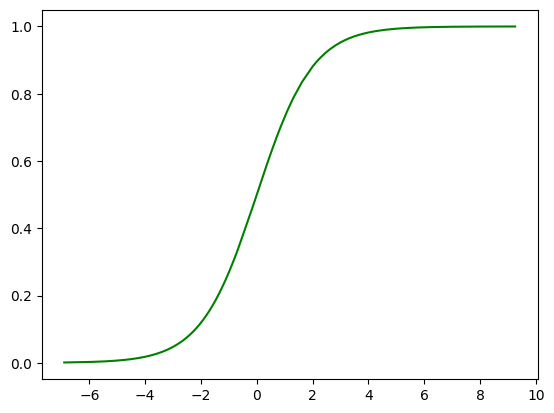

In [116]:
z_test = np.dot(X_test_matrix, w) + b
z_sort = np.sort(z_test)
z_sorted = sigmoid(z_sort)

plt.plot(z_sort, z_sorted, color='green')

## G. GUI

### G.1 Rumus Prediksi Yang Digunakan

#### Rumus TF - IDF

In [ ]:
# 1. Bikin Kamus
vocab_index = build_vocabulary(X_train_clean)

# 2. Hitung IDF
idf_values = calculate_idf(X_train_clean, vocab_index)

# 3. Hitung TF Train & Test
tf_test = calculate_tf(X_test, vocab_index)

# 4. Kalikan jadi TF-IDF Train & TF-IDF Test
X_test_matrix = multiply_tf_idf(tf_test, vocab_index, idf_values)

# 5. Normalisasi Input
X_test_matrix = normalize_l2(X_test_matrix)

#### Rumus Logistic Regression

In [ ]:
    # # 1. Hitung probabilitas (sama kayak waktu training)
    # z = linear_equation(X, w, b)
    # y_prob = sigmoid(z)
    
    # # 2. Ubah probabilitas jadi kelas (0 atau 1)
    # y_class = [1 if p > threshold else 0 for p in y_prob]

### G.2 GUI Tkinter

In [117]:
import tkinter as tk
from tkinter import * 

#FUNGSI PREDIKSI
def prediksi():
    teks_mentah = input_nama.get()
    if not teks_mentah: return

    input_series = pd.Series([teks_mentah])
    clean_series = preprocess_text(input_series)
    teks_bersih = clean_series.iloc[0] 
    input_list = [teks_bersih]
    
    tf_input = calculate_tf(input_list, vocab_index)

    tfidf_input = multiply_tf_idf(tf_input, vocab_index, idf_values)
    tfidf_input = normalize_l2(tfidf_input) 
    
    z = linear_equation(tfidf_input, w, b)
    y_prob = sigmoid(z)
    
    if y_prob > 0.7:
        hasil = "Spam"
        warna ="red"
    else:
        hasil = "Ham"
        warna = "green"
        
    hasil_prediksi.config(text=hasil, fg=warna)


# GUI UTAMA
root = tk.Tk()
root_title = Label(text='AI Spam/Ham Predictor - Email')
root.geometry("500x600")
root.configure(bg='lightblue')

header_frame = Frame(root, bg="#003468", pady=20)
header_frame.pack(fill='x')

Label(header_frame, text='Email Spam/Ham Predictor', font=('Arial', 18, 'bold'), bg='#003468', fg='white').pack()
Label(header_frame, text='Model: Logistic Regression + NLP (TF-IDF)', font=('Arial', 10), bg='#003468', fg='white').pack()

main_frame = Frame(root, bg="#086594", pady=20, padx=20)
main_frame.pack(fill='both', expand=True)

Label(main_frame, text='Masukkan Pesan Email: ', font=('Arial', 12), bg='#086594',fg='white').pack()
input_nama = Entry(main_frame, font=('Arial', 12), bg='white',fg="#000000", justify='center')
input_nama.pack(padx=10, pady=20)

predict = Button(main_frame, command=prediksi, bg="#002574", fg='white', text='Prediksi Pesan', font=('Arial', 14))
predict.pack(padx=30, pady=40)

hasil_prediksi = Label(root, text='-', font=('Arial', 14, 'bold'))
hasil_prediksi.pack(pady=40, padx=20)

root.mainloop()